In [51]:
import numpy as np
def test():
  original = np.array([56, 30, 48, 47, 39, 38, 44, 18, 64, 56, 34, 53, 74, 17, 72, 13, 30, 17, 53])

  import timeit
  import gc
  print("np.version:", np.__version__)
  # t = timeit.Timer("myfunc(original, 6)", "gc.enable()", 
  #                  globals={"myfunc":myfunc,"original":original,"gc":gc}
  #                  ).timeit(number=10000)
  # print(f"{t*1000:.3f}ms")

def myfunc(original, k):
  return np.lib.stride_tricks.sliding_window_view(original, k)

test()

np.version: 1.18.1


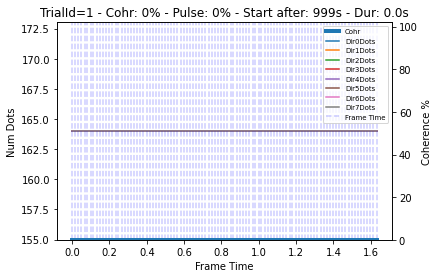

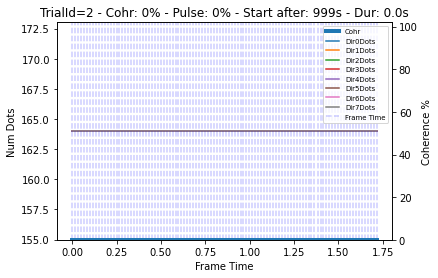

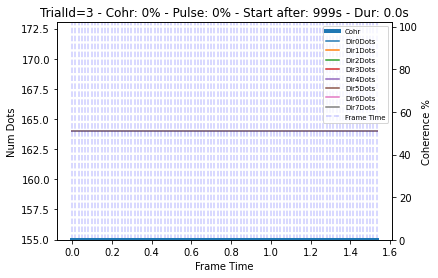

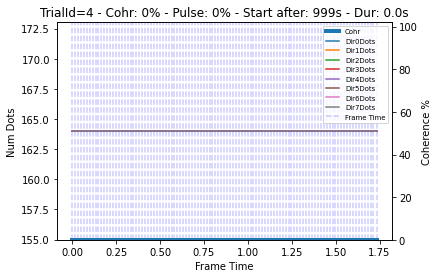

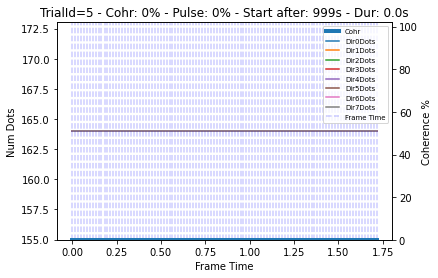

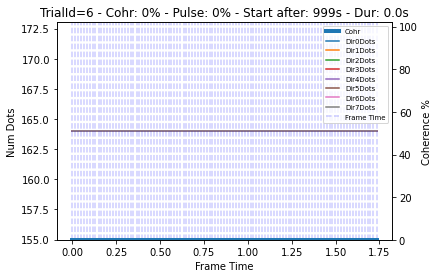

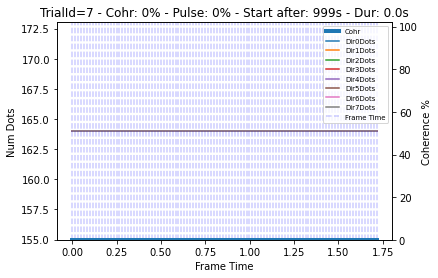

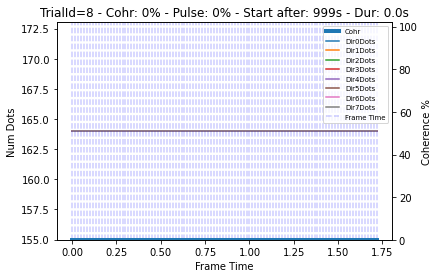

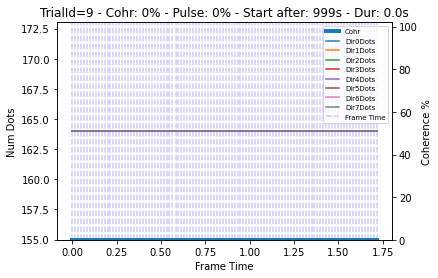

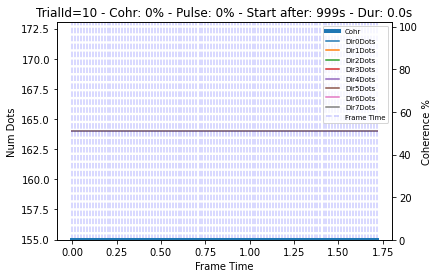

In [58]:
# %matplotlib widget
%matplotlib inline
def process():
  import matplotlib.pyplot as plt
  import pandas as pd
  import os
  from pathlib import Path
  fp = Path(r"C:\BpodUser\Data\Dummy Subject\Mouse2AFC\RDK_Data\\"
            r"Dummy Subject_Mouse2AFC_May20_2021_Session2.pkl")
  #paths = filter(lambda f:f.endswith(".csv"), os.listdir(_dir))
  #for f in paths:
  df = pd.read_pickle(fp)
  # print("df.Enabled:")
  # display(df.Enabled)
  for trial_num, trial_df in df.groupby(df.TrialNumber):
    trial_df = trial_df[trial_df.Enabled]
    #f_csv = f"perf_logs{os.path.sep}{f}"
    first_enabled_time = trial_df.FrameTime.iloc[0]
    fig, ax = plt.subplots()
    twinx_ax = ax.twinx()
    time_clrs = ['k', 'r', 'k', 'g']
    time_clrs_idx = 0
    for col in df.columns:
      if col == "Cohr":
        twinx_ax.plot(trial_df.FrameTime - first_enabled_time,
                      trial_df[col]*100, label=col, linewidth=4)
      elif "Dir" in col:
        ax.plot(trial_df.FrameTime - first_enabled_time, trial_df[col], label=col)
    #   elif col.startswith("time_"):
    #     uniq = trial_df[col].iloc[0]
    #     if uniq:
    #       print(f"{col} = {uniq} - first enabled time:", first_enabled_time)
    #       ax.axvline(uniq - first_enabled_time, c=time_clrs[time_clrs_idx], label=col)
    #     time_clrs_idx += 1
    label_once = "Frame Time"
    for frame_time in trial_df.FrameTime:
      ax.axvline(frame_time - first_enabled_time, alpha=0.2, linestyle="--", c='b',
                 label=label_once)
      label_once = None
    twinx_ax.set_ylabel("Coherence %")
    twinx_ax.set_ylim(0, 102)
    h2, l2, = twinx_ax.get_legend_handles_labels()
    h, l = ax.get_legend_handles_labels()
    ax.legend(h2 + h, l2 + l, fontsize="x-small", loc="upper right")
    ax.set_xlabel("Frame Time")
    ax.set_ylabel("Num Dots")
    cohr = int(df.inf_cohr.iloc[0])
    pulse_cohr = int(df.inf_pulse_cohr.iloc[0]*100)
    pulse_offset = df.inf_pulse_offset.iloc[0]
    pulse_dur = df.inf_pulse_dur.iloc[0]
    ax.set_title(f"TrialId={trial_num} - Cohr: {cohr}% - Pulse: {pulse_cohr}% - "
                 f"Start after: {pulse_offset:.3g}s - Dur: {pulse_dur}s")
    # f_png = f"perf_png{os.path.sep}{f}.png"
    # fig.savefig(f_png)
    plt.show()

process()